In [25]:
import pandas as pd
import geopandas
import missingno as msno


Bad key "text.kerning_factor" on line 4 in
/Users/colinsimon/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Read in CSV:
#### DIRTY May 5 data

In [8]:
may5 = pd.read_csv('./20200505.csv', header=None, delimiter='\t')

## Mapping columns:
#### This hopefully allows us to view NaN's and see if some location columns are better than others
- weird = metadata?
- unknown = I have no idea
- empty = most rows are empty
- code = abbreviated code for something, i.e. 'UK' instead of United Kingdom

In [65]:
may5.columns=['serial_no','weird_date','weird_month','weird_year', 'unknown01', # A-E serial No. and strange dates. website metadata?
              'keyword_code01','keyword01','country_code01','unknown02', # F-I first keyword and abbreviations
              'empty01', 'empty02','empty03', # J-L mostly empty
              'keyword_code02','unknown03', 'empty05', # M-O abbreviations
              'keyword_code03','keyword02','country_code02','unknown04', # P-S second keyword
              'empty06','empty07','empty08','keyword_code03','empty09', 'empty10', # T-Y mostly empty
              'unknown05','unknown06','unknown07','unknown08','unknown09','unknown10','unknown11','unknown12','unknown13', # many unknowns
              'tone','unknown15', # Average Tone
              'location01','country_code03','country_code04', # location in words
              'latitude01','longitude02','mix_loc', # lat and long
              'unknown16','location02','country_code05','country_code06', # location again
              'latitude02','longitude02','unknown17', # lat and long again
              'unknown18','location03','country_code07','country_code08', # location third time
              'latitude03','longitude03','unknown18', # lat and long third time
              'date','url' # date and url
               ]

### EDA

In [66]:
pd.set_option('display.max_columns', 85)
may5.head(60)

,serial_no,weird_date,weird_month,weird_year,unknown01,keyword_code01,keyword01,country_code01,unknown02,empty01,empty02,empty03,keyword_code02,unknown03,empty05,keyword_code03,keyword02,country_code02,unknown04,empty06,empty07,empty08,keyword_code03,empty09,empty10,unknown05,unknown06,unknown07,unknown08,unknown09,unknown10,unknown11,unknown12,unknown13,tone,unknown15,location01,country_code03,country_code04,latitude01,longitude02,mix_loc,unknown16,location02,country_code05,country_code06,latitude02,longitude02,unknown17,unknown18,location03,country_code07,country_code08,latitude03,longitude03,unknown18,date,url
0,921734821,20190506,201905,2019,2019.3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGR,FARMER,NaN,NaN,NaN,NaN,NaN,AGR,NaN,NaN,1,112,112,11,3,-2.0,5,1,5,0.516351,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"South Dakota, United States",US,USSD,44.285300,-99.4632,SD,2,"South Dakota, United States",US,USSD,44.285300,-99.4632,SD,20200505,https://www.capjournal.com/news/s-d-farmers-ge...
1,921734822,20190506,201905,2019,2019.3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEG,CONGRESS,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,0,20,20,2,1,3.0,918,90,918,-2.844378,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"West Virginia, United States",US,USWV,38.468000,-80.9696,WV,2,"West Virginia, United States",US,USWV,38.468000,-80.9696,WV,20200505,https://www.5newsonline.com/article/news/healt...
2,921734823,20190506,201905,2019,2019.3452,LEG,LEGISLATURE,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,JUD,ATTORNEY,NaN,NaN,NaN,NaN,NaN,JUD,NaN,NaN,0,23,23,2,1,3.4,2,1,2,-2.937500,3,"Great Neck, New York, United States",US,USNY,40.800700,-73.7285,951636,3,"Great Neck, New York, United States",US,USNY,40.800700,-73.7285,951636,3,"Great Neck, New York, United States",US,USNY,40.800700,-73.7285,951636,20200505,https://ny.chalkbeat.org/2020/5/4/21247282/who...
3,921734824,20190506,201905,2019,2019.3452,LEG,LEGISLATURE,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,JUD,ATTORNEY,NaN,NaN,NaN,NaN,NaN,JUD,NaN,NaN,0,23,23,2,1,3.4,3,1,3,-2.937500,3,"Great Neck, New York, United States",US,USNY,40.800700,-73.7285,951636,2,"New York, United States",US,USNY,42.149700,-74.9384,NY,3,"Great Neck, New York, United States",US,USNY,40.800700,-73.7285,951636,20200505,https://ny.chalkbeat.org/2020/5/4/21247282/who...
4,921734825,20190506,201905,2019,2019.3452,LEG,SENATOR,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,SPY,INTELLIGENCE,NaN,NaN,NaN,NaN,NaN,SPY,NaN,NaN,0,51,51,5,1,3.4,278,37,278,-1.180416,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,20200505,https://www.1590walg.com/news/trumps-spy-chief...
5,921734826,20190506,201905,2019,2019.3452,LEG,SENATOR,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,SPY,INTELLIGENCE,NaN,NaN,NaN,NaN,NaN,SPY,NaN,NaN,0,51,51,5,1,3.4,72,36,72,-1.179850,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,2,"Virginia, United States",US,USVA,37.768000,-78.2057,VA,2,"Virginia, United States",US,USVA,37.768000,-78.2057,VA,20200505,https://www.1590walg.com/news/trumps-spy-chief...
6,921734827,20190506,201905,2019,2019.3452,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHN,CHINA,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51,51,5,1,3.4,74,37,74,-1.180416,2,"Virginia, United States",US,USVA,37.768000,-78.2057,VA,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,4,"Wuhan, Hubei, China",CH,CH12,30.583300,114.2670,-1930776,20200505,https://www.1590walg.com/news/trumps-spy-chief...
7,921734828,20200405,202004,2020,2020.2603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,72,72,7,2,8.3,1,1,1,-0.974659,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Denver, Colorado, United States",US,USCO,39.739200,-104.9850,201738,2,"New York, United States",US,USNY,42.149700,-74.9384,NY,20200505,https://patch.com/colorado/denver/co-gov-paul-...
8,921734829,20200405,202004,2020,2020.2603,BGD,BANGLADESH,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,73,73,7,2,7.4,2

In [56]:
may5 = may5.drop('trash',1)
may5.head()

,serial_no,weird_date,weird_month,weird_year,unknown01,keyword_code01,keyword01,country_code01,unknown02,empty01,empty02,empty03,keyword_code02,unknown03,empty05,keyword_code03,keyword02,country_code02,unknown04,empty06,empty07,empty08,keyword_code03,empty09,empty10,unknown05,unknown06,unknown07,unknown08,unknown09,unknown10,unknown11,unknown12,unknown13,unknown14,unknown15,location01,country_code03,country_code04,latitude01,longitude02,mix_loc,unknown16,location02,country_code05,country_code06,latitude02,longitude02,unknown17,unknown18,location03,country_code07,country_code08,latitude03,longitude03,unknown18,date,url
0,921734821,20190506,201905,2019,2019.3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGR,FARMER,NaN,NaN,NaN,NaN,NaN,AGR,NaN,NaN,1,112,112,11,3,-2.0,5,1,5,0.516351,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"South Dakota, United States",US,USSD,44.2853,-99.4632,SD,2,"South Dakota, United States",US,USSD,44.2853,-99.4632,SD,20200505,https://www.capjournal.com/news/s-d-farmers-ge...
1,921734822,20190506,201905,2019,2019.3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEG,CONGRESS,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,0,20,20,2,1,3.0,918,90,918,-2.844378,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"West Virginia, United States",US,USWV,38.4680,-80.9696,WV,2,"West Virginia, United States",US,USWV,38.4680,-80.9696,WV,20200505,https://www.5newsonline.com/article/news/healt...
2,921734823,20190506,201905,2019,2019.3452,LEG,LEGISLATURE,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,JUD,ATTORNEY,NaN,NaN,NaN,NaN,NaN,JUD,NaN,NaN,0,23,23,2,1,3.4,2,1,2,-2.937500,3,"Great Neck, New York, United States",US,USNY,40.8007,-73.7285,951636,3,"Great Neck, New York, United States",US,USNY,40.8007,-73.7285,951636,3,"Great Neck, New York, United States",US,USNY,40.8007,-73.7285,951636,20200505,https://ny.chalkbeat.org/2020/5/4/21247282/who...
3,921734824,20190506,201905,2019,2019.3452,LEG,LEGISLATURE,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,JUD,ATTORNEY,NaN,NaN,NaN,NaN,NaN,JUD,NaN,NaN,0,23,23,2,1,3.4,3,1,3,-2.937500,3,"Great Neck, New York, United States",US,USNY,40.8007,-73.7285,951636,2,"New York, United States",US,USNY,42.1497,-74.9384,NY,3,"Great Neck, New York, United States",US,USNY,40.8007,-73.7285,951636,20200505,https://ny.chalkbeat.org/2020/5/4/21247282/who...
4,921734825,20190506,201905,2019,2019.3452,LEG,SENATOR,NaN,NaN,NaN,NaN,NaN,LEG,NaN,NaN,SPY,INTELLIGENCE,NaN,NaN,NaN,NaN,NaN,SPY,NaN,NaN,0,51,51,5,1,3.4,278,37,278,-1.180416,4,"Wuhan, Hubei, China",CH,CH12,30.5833,114.2670,-1930776,4,"Wuhan, Hubei, China",CH,CH12,30.5833,114.2670,-1930776,4,"Wuhan, Hubei, China",CH,CH12,30.5833,114.2670,-1930776,20200505,https://www.1590walg.com/news/trumps-spy-chief...


In [40]:
may5.shape

(141162, 59)

## Missing Values:

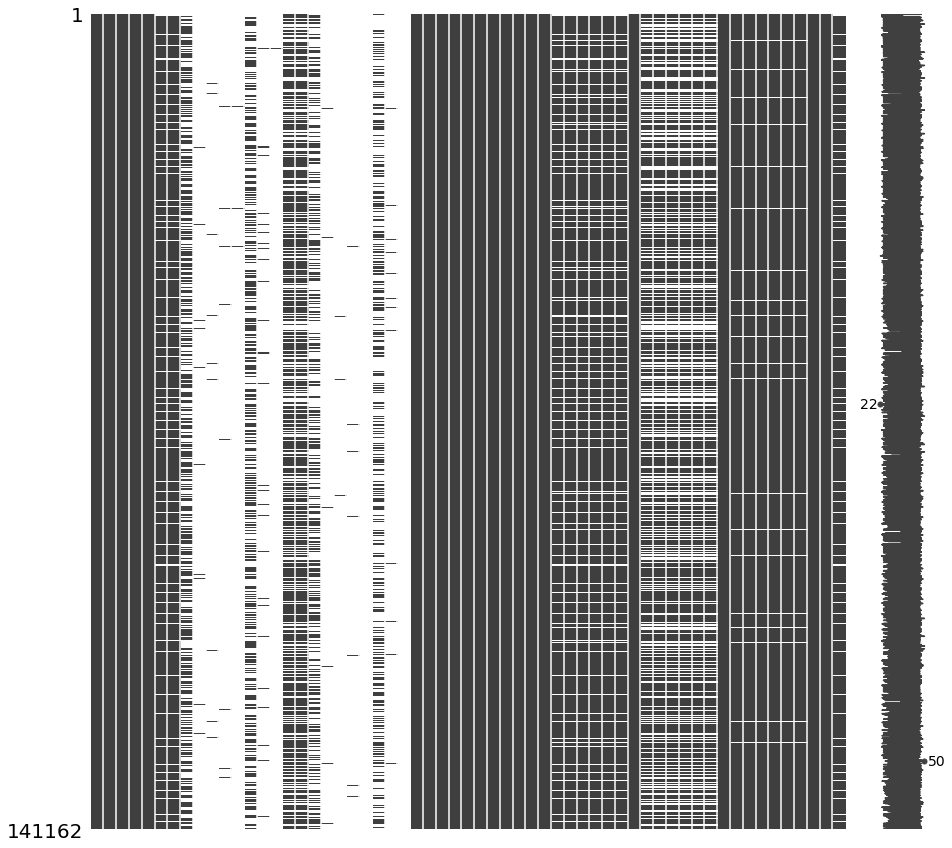

In [41]:
msno.matrix(may5, figsize=(15,15))

In [43]:
may5.isna().sum()

serial_no              0
weird_date             0
weird_month            0
weird_year             0
unknown01              0
keyword_code01     13652
keyword01          13652
country_code01     67307
unknown02         139600
empty01           140284
empty02           139791
empty03           140844
keyword_code02     74806
unknown03         136338
empty05           141037
keyword_code03     43819
keyword02          43819
country_code02     85928
unknown04         139973
empty06           140534
empty07           139956
empty08           140907
keyword_code03     89352
empty09           137778
empty10           141074
unknown05              0
unknown06              0
unknown07              0
unknown08              0
unknown09              0
unknown10              0
unknown11              0
unknown12              0
unknown13              0
unknown14              0
unknown15              0
location01         17281
country_code03     17265
country_code04     17265
latitude01         17281


## The .isna().sum() cell above is very important:
The data columns seem repetitive, listing the location, lat and long repeatedly. We can see that the third set of 'latitude03' and 'longitude03' columns have by far the fewest missing values. 

Out of 141,162 rows, we are missing 3961 locations, so 2.8% missing.

We're missing 13,652 urls or 9.6%.

In [47]:
print(3961/141162)
print(13652/141162)

0.028059959479179948
0.09671157960357603


### Create clean dataframe

In [67]:
may5_clean = may5[['serial_no','latitude03','longitude03','date','tone','keyword01','keyword02','url']]

In [68]:
may5_clean.head()

,serial_no,latitude03,longitude03,date,tone,keyword01,keyword02,url
0,921734821,44.2853,-99.4632,20200505,0.516351,NaN,FARMER,https://www.capjournal.com/news/s-d-farmers-ge...
1,921734822,38.4680,-80.9696,20200505,-2.844378,NaN,CONGRESS,https://www.5newsonline.com/article/news/healt...
2,921734823,40.8007,-73.7285,20200505,-2.937500,LEGISLATURE,ATTORNEY,https://ny.chalkbeat.org/2020/5/4/21247282/who...
3,921734824,40.8007,-73.7285,20200505,-2.937500,LEGISLATURE,ATTORNEY,https://ny.chalkbeat.org/2020/5/4/21247282/who...
4,921734825,30.5833,114.2670,20200505,-1.180416,SENATOR,INTELLIGENCE,https://www.1590walg.com/news/trumps-spy-chief...


In [69]:
may5_clean.shape

(141162, 8)

### CSV new dataframe

In [70]:
may5_clean.to_csv('./20200505clean.csv')